# Breast Cancer Logistic Regression Model (from scratch)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.display import display

# Importing and loading dataset

In [2]:
!curl -L -o ./breast-cancer-dataset.zip https://www.kaggle.com/api/v1/datasets/download/yasserh/breast-cancer-dataset && unzip breast-cancer-dataset


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 49794  100 49794    0     0    98k      0 --:--:-- --:--:-- --:--:--   98k
Archive:  breast-cancer-dataset.zip
  inflating: breast-cancer.csv       


In [3]:
df = pd.read_csv("breast-cancer.csv")

# Dataset infos

In [4]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [5]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

# Plotting

In [7]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


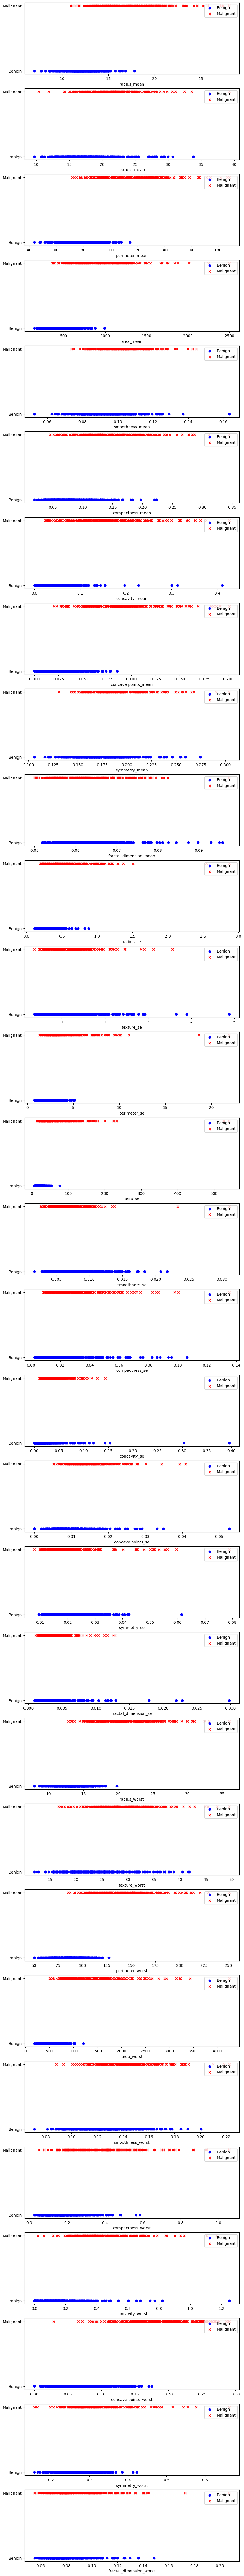

In [8]:
_mask_ben = df["diagnosis"] == 'B'
_mask_mal = df["diagnosis"] == 'M'

#show_ = ["smoothness_worst", "radius_mean", "radius_worst", "radius_se", "texture_mean", "texture_worst", "perimeter_mean", "perimeter_worst", "area_mean", "area_worst", "compactness_mean", "compactness_worst", "fractal_dimension_worst", "symmetry_worst"]
show_ = df.columns.drop(labels=["id", "diagnosis"])

n_plots = len(show_)
fig, ax = plt.subplots(n_plots, 1, figsize=(10, n_plots * 4))
for idx, param in enumerate(show_):
  ax[idx].scatter(df.loc[_mask_ben, param], np.full(_mask_ben.sum(), 0), color="blue", marker="o", label="Benign")

  ax[idx].scatter(df.loc[_mask_mal, param], np.full(_mask_mal.sum(), 1), color="red", marker="x", label="Malignant")

  ax[idx].set_xlabel(param)
  ax[idx].set_yticks([0, 1])
  ax[idx].set_yticklabels(["Benign", "Malignant"])
  ax[idx].legend(loc="upper right")



# Preprocessing

In [9]:
class Preprocessor():
  """
  Normalizes data using min-max norm and adds bias column.
  Fit on train dataset.
  You can pick custom parameters by changing obj.params attribute.
  The fit_transform and transform functions assume that the df is pandas DF
  containing features
  """

  def __init__(self):
    self.mx_ = {}
    self.mn_ = {}
    self.params = df.columns.drop(labels=["id", "diagnosis"])

  def fit(self, df):
    out = self._base_transform(df)
    for feat in out:
      self.mn_[feat] = out[feat].min()
      self.mx_[feat] = out[feat].max()

  def _base_transform(self, df):
    # Since the data doesn't have any empty element there is no need for imputation
    out = df[self.params].copy()
    out["bias_feature"] = np.full(len(out), 1)
    return out

  def transform(self, df):
    # Normalization(min-max)
    out = self._base_transform(df)
    for feat in out:
      if self.mn_[feat] != self.mx_[feat]:
        out[feat] = (out[feat] - self.mn_[feat]) / (self.mx_[feat] - self.mn_[feat])
      else:
        out.drop(columns=feat)
    return out

  def fit_transform(self, df):
    self.fit(df)
    return self.transform(df)


In [10]:
train_df = df.sample(frac=0.8, random_state=32)
test_df = df.drop(labels=train_df.index)

In [11]:
pp = Preprocessor()
pp.fit(train_df)

In [12]:
x_train = pp.transform(train_df)
x_test = pp.transform(test_df)
y_train = train_df["diagnosis"].apply(lambda x: 1 if x == 'M' else 0)
y_test = test_df["diagnosis"].apply(lambda x: 1 if x == 'M' else 0)

# Model

In [13]:
class LogisticModel():
  """
  Note: The model execpts that the last feature of data be 1 for in eatch row.
  The model expects that the label y to be 1D np vector.
  The model expects that the data be in 2D numpy matrix which every column
  corresponds to a feature and every row corresponds to a sample
  """
  def __init__(self, n_features):
    self.w = np.random.rand(n_features)
    self.n_feat = n_features
  def predict(self, x):
    z = x @ self.w
    out = 1/(1 + np.exp(-z))
    return out
  def __call__(self, x):
    return self.predict(x)
  def fit(self, x, y, epochs, lr=1e-2):
    n = len(y)
    for epoch in range(epochs):
      y_hat = self.predict(x)
      e = y_hat - y
      dw = (x.T @ e)/n
      self.w -= lr*dw
      if epoch % 2 == 0:
        print(f"epoch {epoch} | MSE --> {(e ** 2).mean()}")
  def acc(self, x, y):
    n = len(y)
    y_hat = self.predict(x)
    y_hat.apply(lambda y: 1 if y >= .5 else 0)
    wrong = abs(y_hat - y).sum()
    a = (1-(wrong/n)) * 100
    print(f"accuarcy ---> {a:.3f}%")
    return a




In [14]:
lgr = LogisticModel(x_train.shape[1])

In [15]:
lgr.fit(x_train, y_train, 1000, .35)

epoch 0 | MSE --> 0.5402660282630152
epoch 2 | MSE --> 0.4600212081507731
epoch 4 | MSE --> 0.34812250849988263
epoch 6 | MSE --> 0.24764048484882736
epoch 8 | MSE --> 0.19015190063799012
epoch 10 | MSE --> 0.16530816150967603
epoch 12 | MSE --> 0.15467681703581226
epoch 14 | MSE --> 0.1489672895317572
epoch 16 | MSE --> 0.14489684332933966
epoch 18 | MSE --> 0.1414350471366981
epoch 20 | MSE --> 0.13826692695404655
epoch 22 | MSE --> 0.13529325273060472
epoch 24 | MSE --> 0.13247877877828476
epoch 26 | MSE --> 0.12980717792330912
epoch 28 | MSE --> 0.12726782872246586
epoch 30 | MSE --> 0.12485201190419941
epoch 32 | MSE --> 0.12255185193827352
epoch 34 | MSE --> 0.12036003765280628
epoch 36 | MSE --> 0.11826974987114904
epoch 38 | MSE --> 0.11627463543392304
epoch 40 | MSE --> 0.11436878638578293
epoch 42 | MSE --> 0.11254671629638903
epoch 44 | MSE --> 0.11080333391553386
epoch 46 | MSE --> 0.10913391573625776
epoch 48 | MSE --> 0.10753407877841023
epoch 50 | MSE --> 0.1059997544227

In [16]:
lgr.acc(x_test, y_test)

accuarcy ---> 90.264%


np.float64(90.26424838491533)

In [17]:
def _show_function(model:LogisticModel, x_data, y_data, feat, feat_idx, func_acc = 500, reverse = False):
  _mask_ben = y_data == 0
  _mask_mal = y_data == 1
  plt.scatter(x_data.loc[_mask_ben, feat], y_data.loc[_mask_ben], label="Benign", color="blue", marker="o")
  plt.scatter(x_data.loc[_mask_mal, feat], y_data.loc[_mask_mal], label="Malignant", color="red", marker="x")

  _sample = x_data.sample(1, random_state=32)
  w = model.w[feat_idx]
  z = _sample @ model.w
  z -= _sample[feat] * w
  z = z.iloc[0]
  display(z)
  fn = lambda x: 1/(1+np.exp(-x))
  x = np.linspace(0, 1, func_acc)
  y_tmp = fn(w * x + z)
  if not reverse:
    y = y_tmp
    plt.ylabel("prob")
    plt.plot(x, y, color="yellow", label="function")
  else:
    y = 1-(y_tmp)
    plt.ylabel("1-prob")
    plt.plot(x, y, color="yellow", label="function")
  plt.legend(loc="center left")
  plt.xlabel(feat)
  plt.show()

/tmp/ipython-input-1842814375.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  w = model.w[feat_idx]


np.float64(-5.985640959790949)

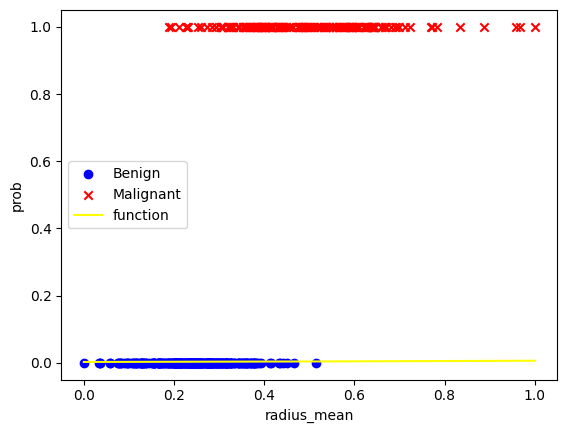

/tmp/ipython-input-1842814375.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  w = model.w[feat_idx]


np.float64(-6.065485835230252)

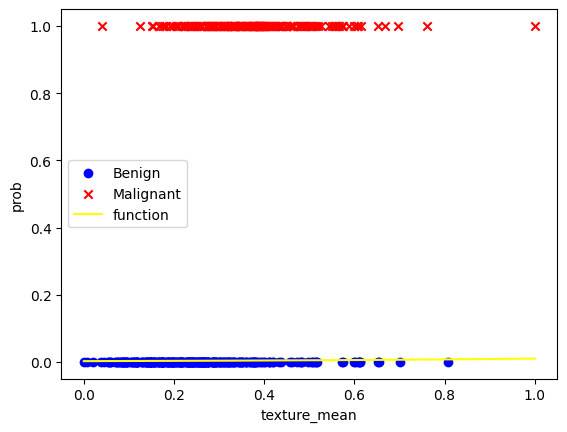

/tmp/ipython-input-1842814375.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  w = model.w[feat_idx]


np.float64(-6.000518655430861)

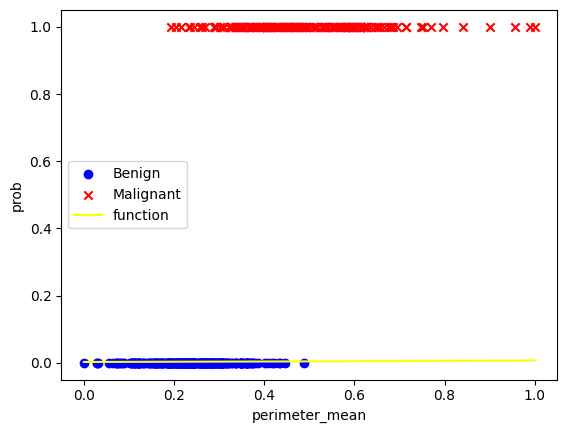

/tmp/ipython-input-1842814375.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  w = model.w[feat_idx]


np.float64(-5.984449327393058)

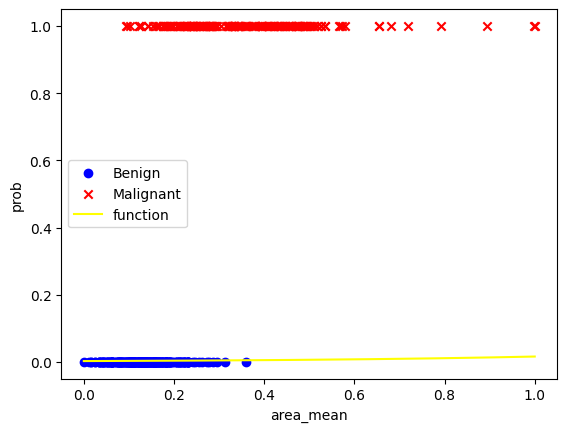

/tmp/ipython-input-1842814375.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  w = model.w[feat_idx]


np.float64(-5.7669509836467805)

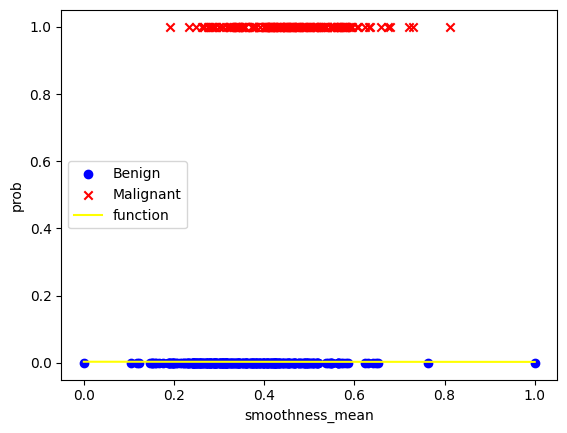

/tmp/ipython-input-1842814375.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  w = model.w[feat_idx]


np.float64(-6.048871477182418)

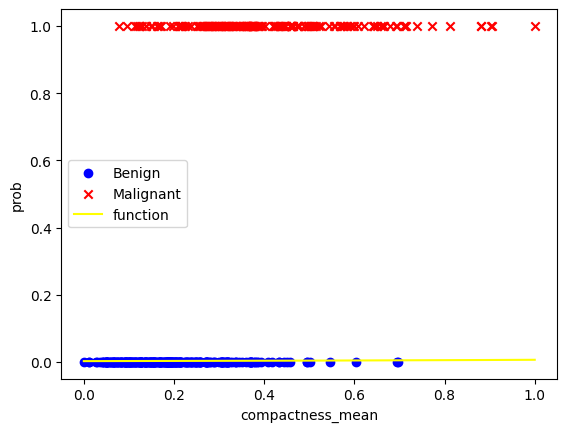

/tmp/ipython-input-1842814375.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  w = model.w[feat_idx]


np.float64(-5.896074171870925)

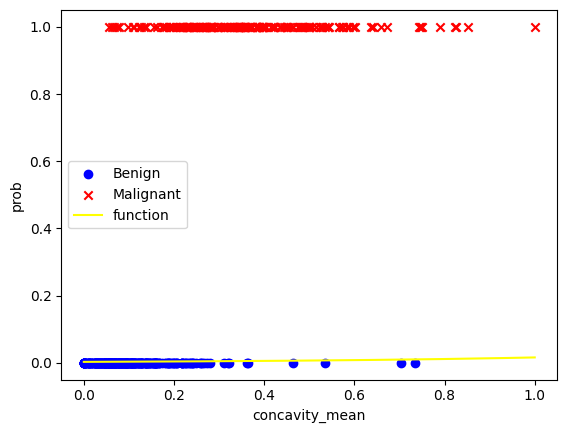

/tmp/ipython-input-1842814375.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  w = model.w[feat_idx]


np.float64(-6.062386566652149)

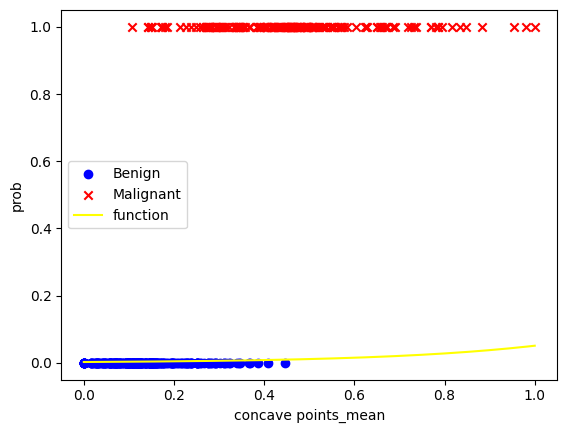

/tmp/ipython-input-1842814375.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  w = model.w[feat_idx]


np.float64(-5.382140676324283)

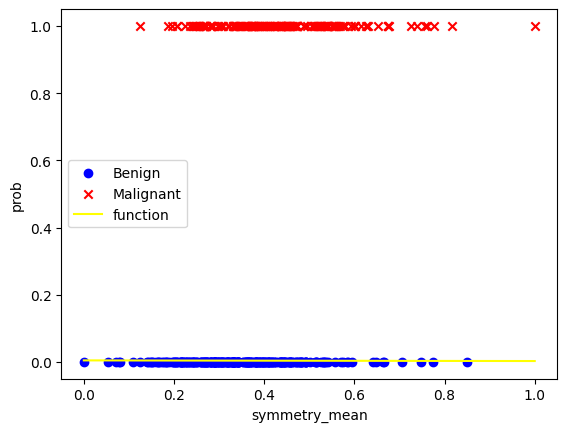

/tmp/ipython-input-1842814375.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  w = model.w[feat_idx]


np.float64(-5.07066317032998)

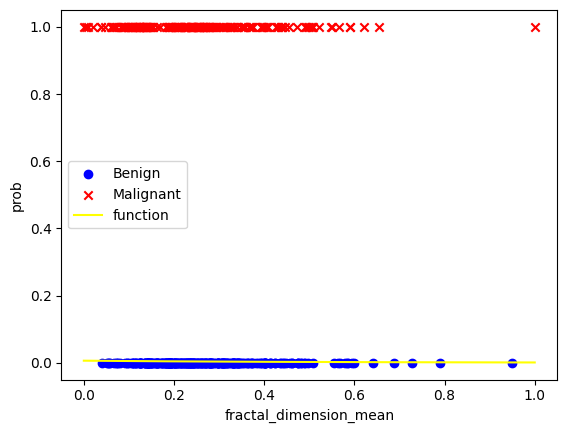

/tmp/ipython-input-1842814375.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  w = model.w[feat_idx]


np.float64(-6.022255487696129)

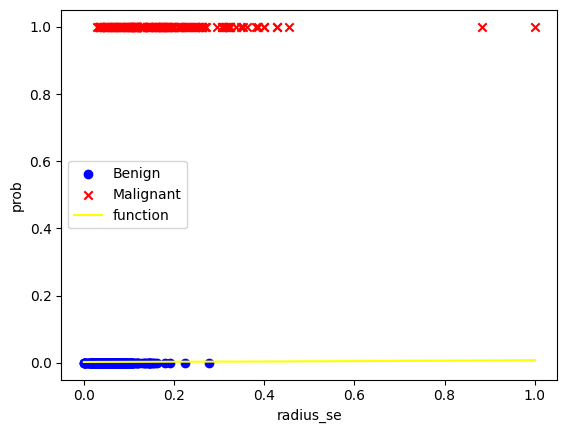

/tmp/ipython-input-1842814375.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  w = model.w[feat_idx]


np.float64(-5.811522454789973)

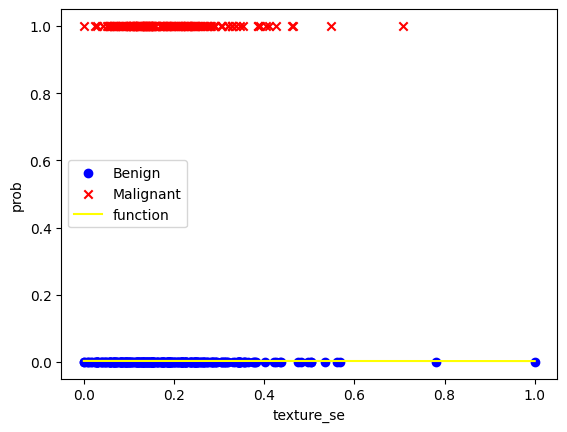

/tmp/ipython-input-1842814375.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  w = model.w[feat_idx]


np.float64(-6.028807027510351)

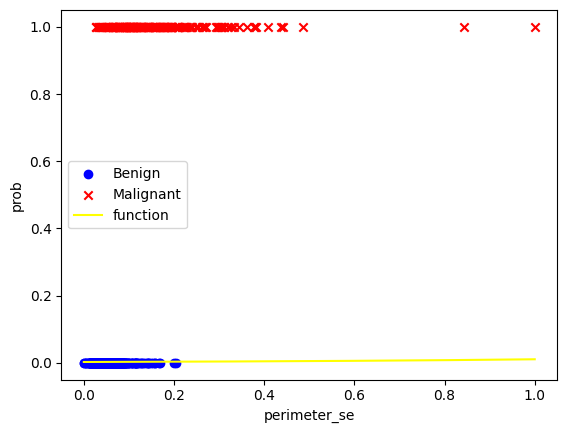

/tmp/ipython-input-1842814375.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  w = model.w[feat_idx]


np.float64(-5.9400228319220645)

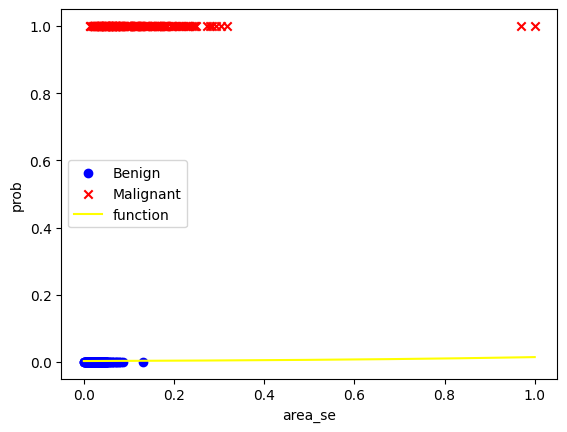

/tmp/ipython-input-1842814375.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  w = model.w[feat_idx]


np.float64(-5.7450213025448)

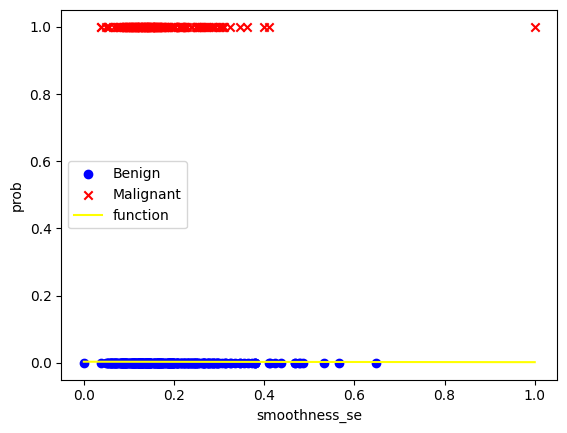

/tmp/ipython-input-1842814375.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  w = model.w[feat_idx]


np.float64(-5.7872280769711475)

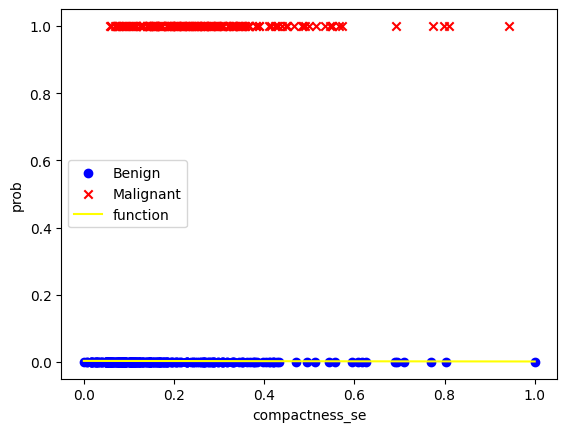

/tmp/ipython-input-1842814375.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  w = model.w[feat_idx]


np.float64(-5.858879467718205)

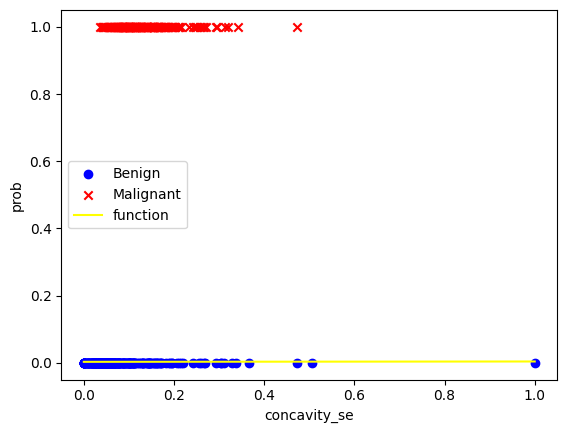

/tmp/ipython-input-1842814375.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  w = model.w[feat_idx]


np.float64(-5.781947603751679)

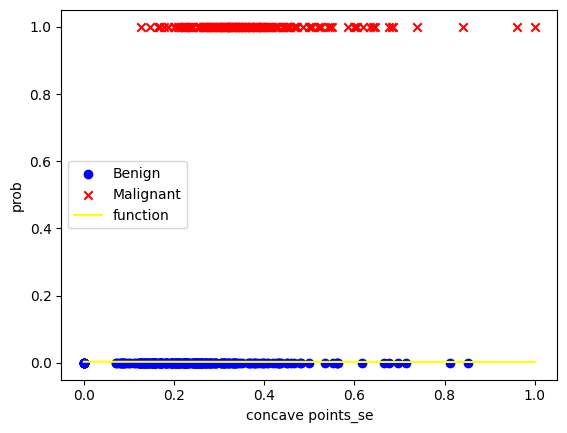

/tmp/ipython-input-1842814375.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  w = model.w[feat_idx]


np.float64(-5.313452709438666)

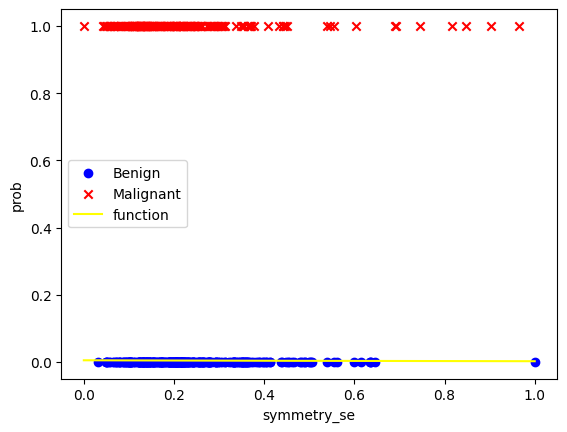

/tmp/ipython-input-1842814375.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  w = model.w[feat_idx]


np.float64(-5.674140498540074)

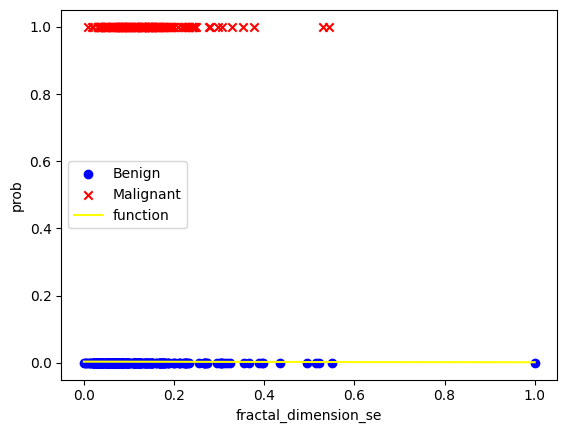

/tmp/ipython-input-1842814375.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  w = model.w[feat_idx]


np.float64(-6.08921792035496)

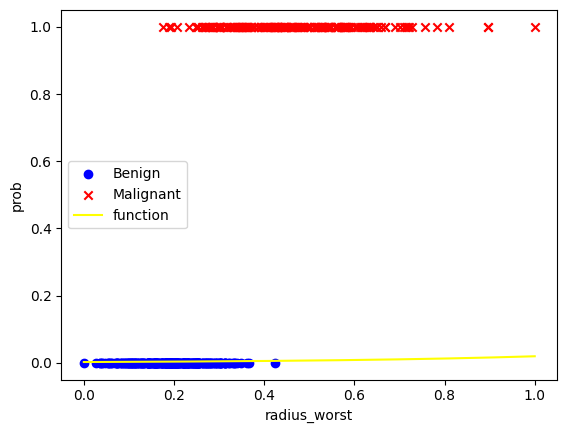

/tmp/ipython-input-1842814375.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  w = model.w[feat_idx]


np.float64(-6.094169448434932)

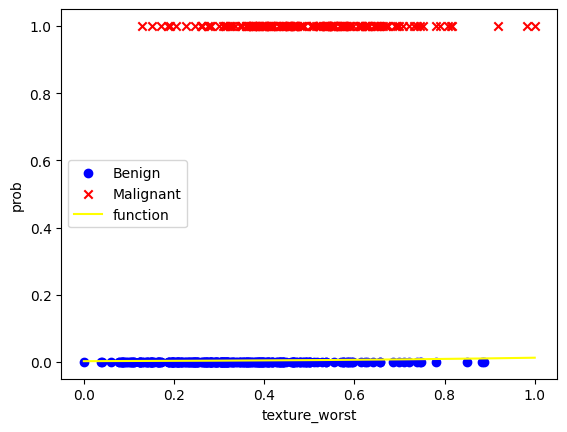

/tmp/ipython-input-1842814375.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  w = model.w[feat_idx]


np.float64(-6.094169448434932)

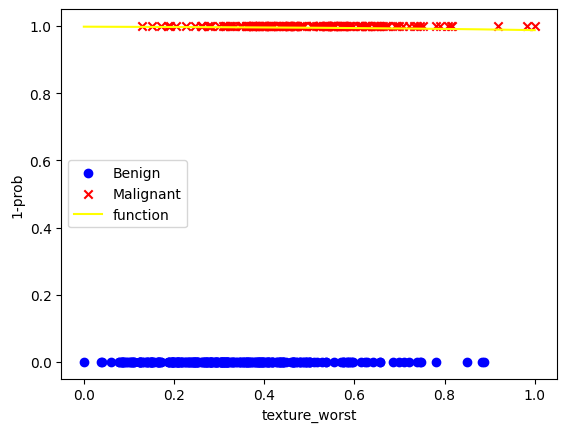

/tmp/ipython-input-1842814375.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  w = model.w[feat_idx]


np.float64(-6.013186970515184)

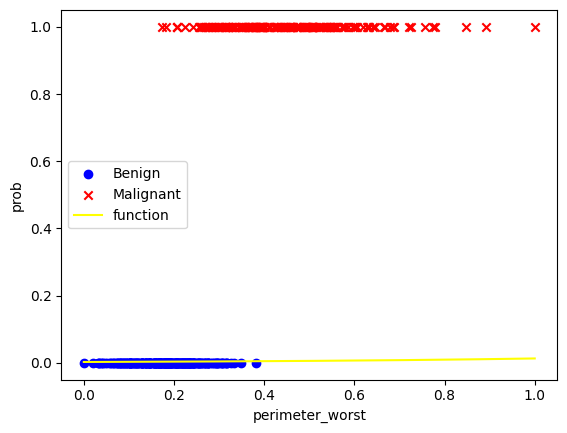

/tmp/ipython-input-1842814375.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  w = model.w[feat_idx]


np.float64(-5.929234108179418)

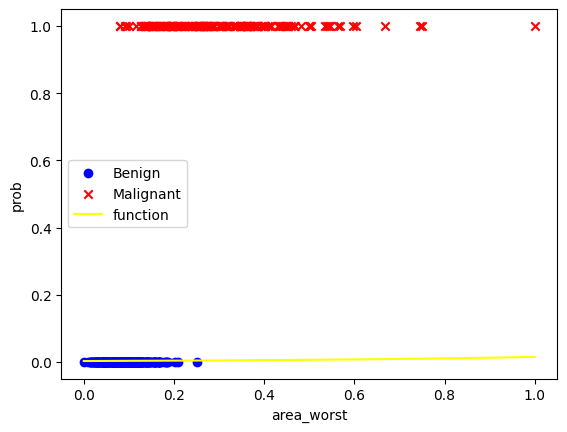

/tmp/ipython-input-1842814375.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  w = model.w[feat_idx]


np.float64(-6.085484027125017)

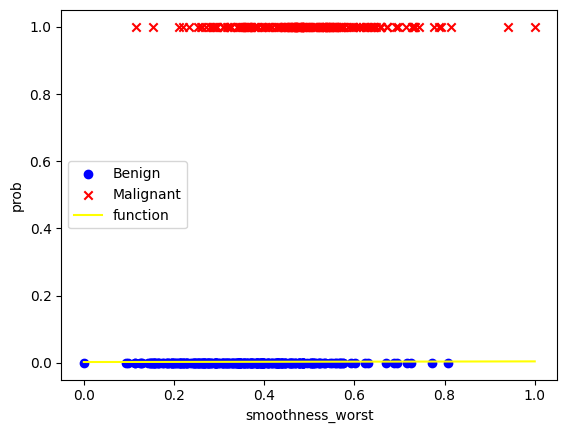

/tmp/ipython-input-1842814375.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  w = model.w[feat_idx]


np.float64(-5.937675553344945)

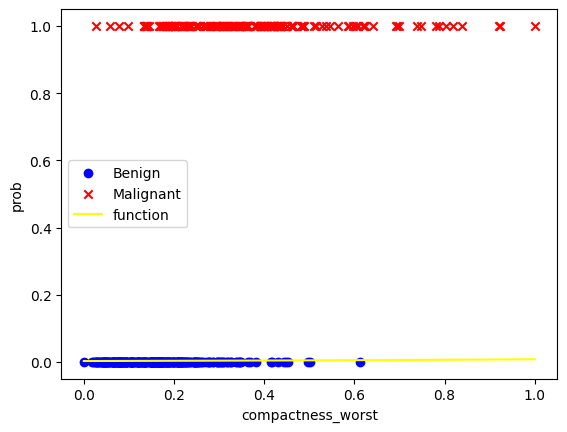

/tmp/ipython-input-1842814375.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  w = model.w[feat_idx]


np.float64(-5.876623923486524)

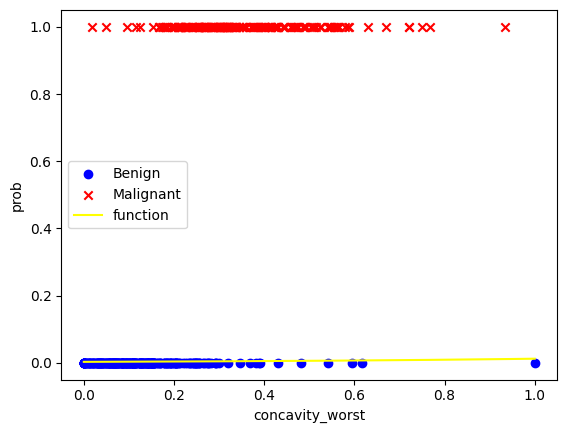

/tmp/ipython-input-1842814375.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  w = model.w[feat_idx]


np.float64(-6.114123232010703)

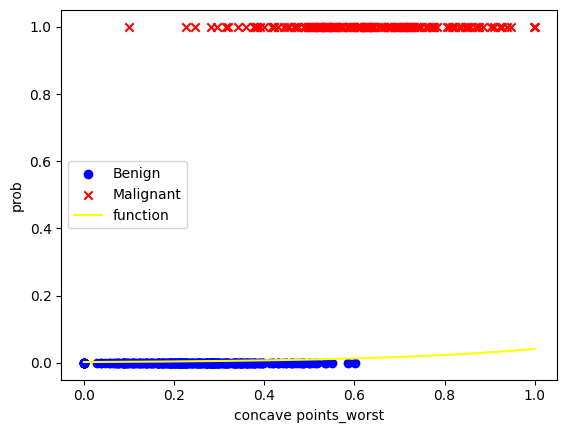

/tmp/ipython-input-1842814375.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  w = model.w[feat_idx]


np.float64(-6.194176473903351)

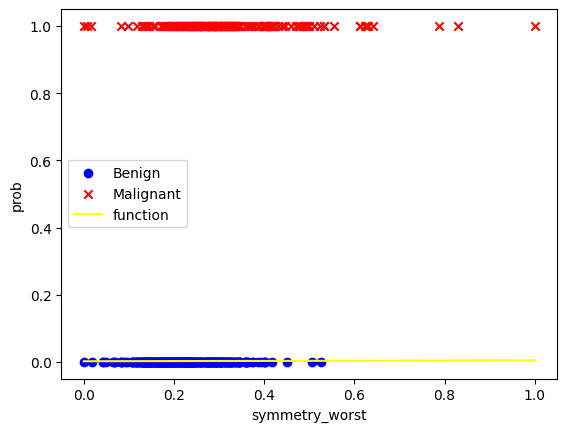

/tmp/ipython-input-1842814375.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  w = model.w[feat_idx]


np.float64(-5.892621683387741)

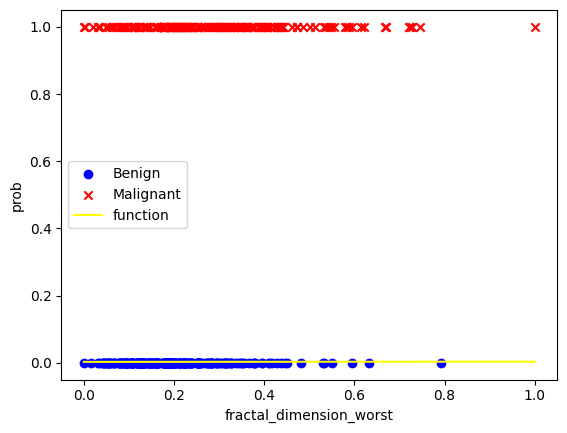

In [18]:
_show = x_train.drop(columns = "bias_feature")
for _feat in _show:
  _show_function(lgr,x_train, y_train, _feat, x_train.columns.get_loc(_feat))
  if _feat == "texture_worst":
    _show_function(lgr,x_train, y_train, _feat, x_train.columns.get_loc(_feat), reverse=True)



<Axes: >

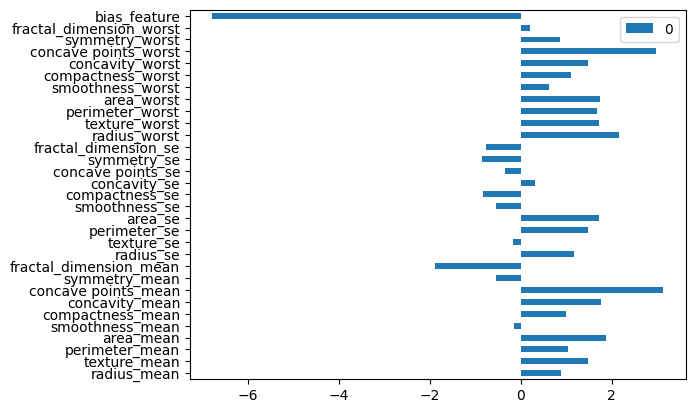

In [19]:
_df = pd.DataFrame(lgr.w, index=x_train.columns)
_df.plot.barh()